<a href="https://colab.research.google.com/github/RasaStulge/Sentiment-analysis/blob/main/russianvsukraniantweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import os
import gzip
import csv
import json
import warnings
import re

In [2]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls

gdrive	sample_data


In [6]:
import matplotlib.pyplot as plt

In [4]:
os.environ ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [5]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [7]:
!pwd

/content/gdrive/MyDrive/kaggle_dataset


###Prepare data

In [8]:
! kaggle datasets download -d bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows

100% 9.04G/9.05G [01:00<00:00, 197MB/s]
100% 9.05G/9.05G [01:00<00:00, 160MB/s]


In [9]:
!unzip ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip

Archive:  ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip
replace 0401_UkraineCombinedTweetsDeduped.csv.gzip? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: 0401_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0402_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0403_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0404_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0405_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0406_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0407_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0408_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0409_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0410_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0411_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0412_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0413_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0414_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0415_UkraineCombi

### Choose data for model

In [10]:
#February
file27_2 = r"/content/gdrive/MyDrive/kaggle_dataset/UkraineCombinedTweetsDeduped20220227-131611.csv.gzip"
file027_2 = r"/content/gdrive/MyDrive/kaggle_dataset/UkraineCombinedTweetsDeduped_FEB27.csv.gzip"
file28_2 = r"/content/gdrive/MyDrive/kaggle_dataset/UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip"
file028_2 = r"/content/gdrive/MyDrive/kaggle_dataset/UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip"

#March
#file1_3  = r"/content/gdrive/MyDrive/kaggle_dataset/UkraineCombinedTweetsDeduped_MAR01.csv.gzip"
file4_3  = r"/content/gdrive/MyDrive/kaggle_dataset/UkraineCombinedTweetsDeduped_MAR04.csv.gzip"

#April
#file1_4 = r"/content/gdrive/MyDrive/kaggle_dataset/0401_UkraineCombinedTweetsDeduped.csv.gzip"
#file20_4  = r"/content/gdrive/MyDrive/kaggle_dataset/0520_UkraineCombinedTweetsDeduped.csv.gzip"

#May
#file1_5  = r"/content/gdrive/MyDrive/kaggle_dataset/0501_UkraineCombinedTweetsDeduped.csv.gzip"
#file30_5  = r"/content/gdrive/MyDrive/kaggle_dataset/0530_UkraineCombinedTweetsDeduped.csv.gzip"

#June
#file5_6  = r"/content/gdrive/MyDrive/kaggle_dataset/0605_UkraineCombinedTweetsDeduped.csv.gzip"
#file10_6  = r"/content/gdrive/MyDrive/kaggle_dataset/0610_UkraineCombinedTweetsDeduped.csv.gzip"


In [50]:
df27_2 = pd.read_csv(file27_2, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df027_2 = pd.read_csv(file027_2, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df28_2 = pd.read_csv(file28_2, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df028_2 = pd.read_csv(file028_2, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)

#df1_3  = pd.read_csv(file1_3, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df4_3  = pd.read_csv(file4_3, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)

#df1_4 = pd.read_csv(file1_4, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
#df20_4  = pd.read_csv(file20_4, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)

#df1_5  = pd.read_csv(file1_5, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
#df30_5  = pd.read_csv(file30_5, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)

#df5_6  = pd.read_csv(file5_6, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
#df10_6  = pd.read_csv(file10_6, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)

In [51]:
df1 = pd.concat([df27_2,df027_2,df28_2,df028_2])
#df2 = pd.concat([df1_3,df4_3])
#df3 = pd.concat([df1_4,df20_4])
#df4 = pd.concat([df1_5,df30_5])
#df5 = pd.concat([df5_6,df10_6])

df = pd.concat([df4_3,df1])

#print(len(df1), 'tweets from from 27-28 FEB')
#print(len(df2), 'tweets from 1 and 4 MAR')
#print(len(df3),'tweets from 1 and 20 APR')
#print(len(df4), 'tweets from 1 and 30 MAY')
#print(len(df5), 'tweets from 5 and 10 JUN')
print(len(df),'tweets from all chousen period')

2444828 tweets from all chousen period


In [52]:
df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
1378357,962159694046523392,CuttingEdgeDino,"Always thinking, -Let's Go Brandon!- #LGB",NaN,429,205,7624,2018-02-10 03:02:01.000000,1499535089977282566,2022-03-04 00:00:00,0,@SenFeinstein you and your #oligarch cronies (...,"[{'text': 'oligarch', 'indices': [27, 36]}, {'...",en,NaN,0,2022-03-04 00:01:56.550039
1378358,1407899290790473732,SectionChine,"Infos sans préjugés sur la Chine, avec une dom...",NaN,1234,1223,162,2021-06-24 06:06:32.000000,1499535090279272486,2022-03-04 00:00:00,0,La crise en #Ukraine a déplacé la stratégie du...,"[{'text': 'Ukraine', 'indices': [12, 20]}, {'t...",fr,NaN,0,2022-03-04 00:01:56.542631
1378359,770039615550021632,Valentinmsn2,Chtx/Angers,"Angers, France",282,244,9053,2016-08-28 23:25:26.000000,1499535090505949186,2022-03-04 00:00:00,883,Vous doutez de notre force de dissuasion ? #Uk...,"[{'text': 'Ukraine', 'indices': [61, 69]}]",fr,NaN,0,2022-03-04 00:01:56.535210
1378360,952334892003680257,ShaunaO2011,NaN,NaN,1373,266,18115,2018-01-14 00:21:46.000000,1499535090661134336,2022-03-04 00:00:00,1,Their bloods are on the Russian hands.\nMilita...,"[{'text': 'Mariupol', 'indices': [77, 86]}, {'...",en,NaN,0,2022-03-04 00:01:56.527344
1378361,1496695221366759427,thewelshtudor,"Pub quiz aficionado. Beer, whisky, BBQ enthusi...","Manchester, England",20,12,809,2022-02-24 03:55:38.000000,1499535090677948419,2022-03-04 00:00:00,265,9:32 pm in #Ukraine. \n\nMy colleague from Sum...,"[{'text': 'Ukraine', 'indices': [30, 38]}]",en,NaN,0,2022-03-04 00:01:56.519788


### Top 100 tweets

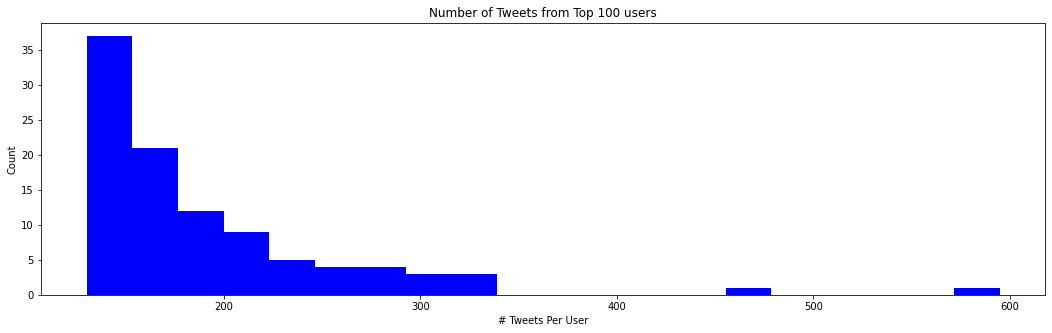

In [19]:
top_100_tweets_count = df["userid"].value_counts().nlargest(100)

plt.figure(figsize=(18,5))
plt.hist(top_100_tweets_count,bins=20,color='blue')
plt.ylabel('Count')
plt.xlabel('# Tweets Per User')
plt.title('Number of Tweets from Top 100 users')
plt.show()

30-40 tweets per person

### Sentiment Score

In [15]:
df.drop_duplicates().any

<bound method NDFrame._add_numeric_operations.<locals>.any of                       userid         username  \
1378357   962159694046523392  CuttingEdgeDino   
1378358  1407899290790473732     SectionChine   
1378359   770039615550021632     Valentinmsn2   
1378360   952334892003680257      ShaunaO2011   
1378361  1496695221366759427    thewelshtudor   
...                      ...              ...   
140379              17185461         cratylus   
140380            3314420144          DyNEn_L   
140381    979378741884407810       son_sonnnn   
140382             324746604        OS_Beaver   
140383            2770429273  quovadisschland   

                                                  acctdesc  \
1378357          Always thinking, -Let's Go Brandon!- #LGB   
1378358  Infos sans préjugés sur la Chine, avec une dom...   
1378359                                        Chtx/Angers   
1378360                                                NaN   
1378361  Pub quiz aficionado. Beer, whi

In [16]:
col=df['language']
col

1378357    en
1378358    fr
1378359    fr
1378360    en
1378361    en
           ..
140379     en
140380     th
140381     ru
140382     en
140383     de
Name: language, Length: 2444828, dtype: object

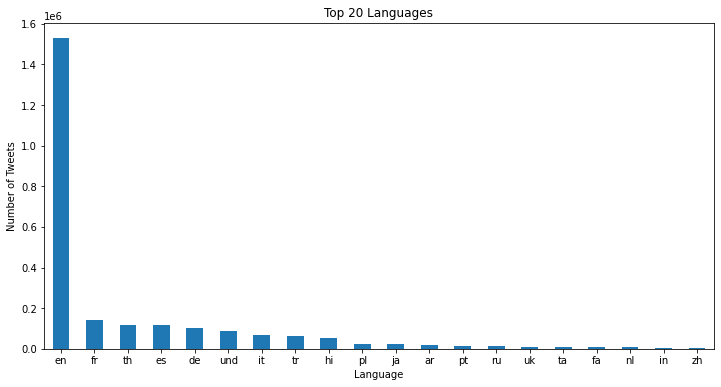

In [17]:
language_counts = df.groupby("language").size().sort_values(ascending=False)[0:20].plot.bar(figsize=(12,6),
                                                                                         title="Top 20 Languages",
                                                                                         xlabel="Language",
                                                                                         ylabel="Number of Tweets",
                                                                                         rot=90
                                                                                         );

plt.xticks(rotation=0)
plt.show()

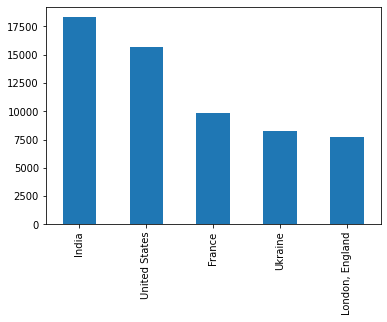

In [18]:
df.location.value_counts()[:5].plot.bar()

###Hashtags

In [21]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.2 MB/s 


In [22]:
from unidecode import unidecode
def evaluate_hashtags(x):
    hashtags = []
    
    a = eval(str(x))
    
    for item in a:
        hashtags.append((str(unidecode(item["text"])).lower()))
        hashtags = list(set(hashtags))
        
    return hashtags

In [23]:
masterlist = []
hashtagsListCollection = df["hashtags"].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        masterlist.append(hashtag)

In [24]:
topXItem = 25
from collections import Counter

x = Counter(masterlist)

topXItemList = x.most_common(topXItem)

In [25]:
df1 = pd.DataFrame(topXItemList)
df1.columns =['Hashtag','text']
df1

,Hashtag,text
0,ukraine,920862
1,russia,390948
2,putin,306817
3,kyiv,97176
4,stopputin,90674
5,ukrainerussiawar,84151
6,russiaukrainewar,75482
7,ukrainerussia,73985
8,russian,65164
9,safeairliftukraine,64434


In [73]:
!pip install advertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 309 kB 4.9 MB/s 
     |████████████████████████████████| 264 kB 42.1 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 4.0 MB 51.9 MB/s 
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 3.1 MB 34.9 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 251 kB 56.3 MB/s 
     |████████████████████████████████| 74 kB 3.0 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11516 sha256=12e2f0921e56a12ece0a28674302b342541d817f62e2597f2b0358b624c59ebf
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa69a339198e08bb63b7da2c45933a3428b29ec454
Successfully built PyDispatcher


In [74]:
import advertools as adv

In [75]:
hashtag_summary = adv.extract_hashtags(df['text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [76]:
hashtag_summary['hashtags'][:10]

[['#oligarch', '#ukraine', '#russian'],
 ['#ukraine', '#chine', '#taiwan'],
 ['#ukraine'],
 ['#mariupol', '#ukraine'],
 ['#ukraine'],
 ['#atdigital',
  '#ukraine',
  '#russia',
  '#ukrainecrisis',
  '#russiaukraineconflict',
  '#re'],
 ['#icymi', '#un', '#russia', '#ukraine', '#moscow'],
 ['#ukriane', '#brd'],
 ['#photoprintday', '#ukraine'],
 ['#zaporizhzhia',
  '#zaporizhzhia',
  '#nuclear',
  '#ukrainerussiawar',
  '#ukraine',
  '#енергодар']]

In [26]:
import pandas as pd

In [27]:
warnings.simplefilter(action='ignore')

In [28]:
!pip install vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.1 MB/s 


In [29]:
nltk.download('vader_lexicon')
Sentie = SentimentIntensityAnalyzer()
df["Positive"] = [Sentie.polarity_scores(i)["pos"] for i in df["text"]]
df["Negative"] = [Sentie.polarity_scores(i)["neg"] for i in df["text"]]
df["Neutral"] = [Sentie.polarity_scores(i)["neu"] for i in df["text"]]
df = df[["text", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                      text  Positive  \
1378357  @SenFeinstein you and your #oligarch cronies (...      0.00   
1378358  La crise en #Ukraine a déplacé la stratégie du...      0.00   
1378359  Vous doutez de notre force de dissuasion ? #Uk...      0.00   
1378360  Their bloods are on the Russian hands.\nMilita...      0.00   
1378361  9:32 pm in #Ukraine. \n\nMy colleague from Sum...      0.08   

         Negative  Neutral  
1378357     0.212    0.788  
1378358     0.000    1.000  
1378359     0.000    1.000  
1378360     0.000    1.000  
1378361     0.296    0.624  


In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def score_sentiment(compound_score):
    if compound_score >= 0.05:
        return("Positive")
    elif compound_score < 0.05 and compound_score >= -0.05:
        return("Neutral")
    else:
        return("Negative")

In [57]:
df["Text_sentiment"] = df["text"].map(lambda x: score_sentiment(analyser.polarity_scores(x)['compound']))

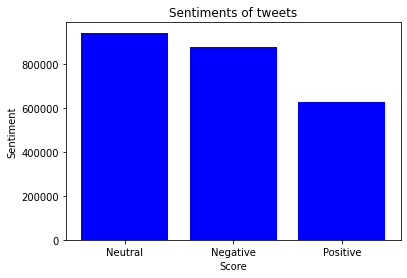

In [58]:
text_sentiment_counts = df["Text_sentiment"].value_counts().to_dict()
plt.bar(text_sentiment_counts.keys(),height=text_sentiment_counts.values(),color='blue')
plt.ylabel('Sentiment')
plt.xlabel('Score')
plt.title('Sentiments of tweets')
plt.show()

In [ ]:
#plt.matshow(df.corr())
#plt.show()

#used literature:
https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-using-twitter-data/